In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express  as px
import plotly.graph_objects   as go
from plotly.subplots import make_subplots
import dash
from dash import Dash, dcc, html, Input, Output



df_co2 = pd.read_csv('./dados_energia_simulados_ptbr.csv')

df_co2

,Ano,Continente,País,Setor,Consumo_Energia_Renovável (MWh),Consumo_Energia_Fóssil (MWh),Emissões_CO2 (toneladas),PIB (milhões de USD),População (milhões)
0,2016,Oceania,China,Comercial,7397.685031,12535.546950,78910.224574,2.463037e+06,165.908531
1,2020,América do Sul,Brasil,Transporte,971.598203,10036.494790,93896.756176,6.152132e+06,19.864661
2,2003,América do Sul,China,Indústria,5455.079849,6789.106081,22068.881619,2.228470e+06,184.533453
3,2019,América do Sul,China,Indústria,2778.436239,12941.548015,49534.631946,6.481451e+06,134.801730
4,2019,América do Sul,Rússia,Residencial,6429.091172,11755.142517,117101.029860,3.262370e+06,76.268548
...,...,...,...,...,...,...,...,...,...
1995,2015,Ásia,Rússia,Transporte,6174.180266,15064.717870,46007.220740,4.508684e+06,88.329964
1996,2004,América do Norte,Austrália,Residencial,5830.025049,11171.756011,94509.378347,3.220615e+06,183.781460
1997,2004,Ásia,China,Indústria,3582.590823,15129.916098,148449.630977,5.943108e+06,137.441825
1998,2009,Oceania,Estados Unidos,Residencial,2798.483361,10352.844393,50669.152564,5.887057e+06,50.080865


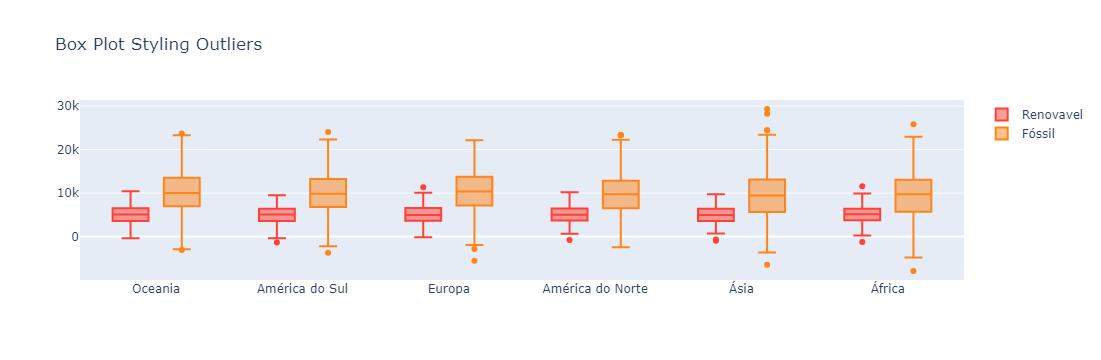

In [61]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=df_co2["Consumo_Energia_Renovável (MWh)"],
    x=df_co2["Continente"],
    name="Renovavel",
    marker_color='#FF4136'
))

fig.add_trace(go.Box(
    y=df_co2["Consumo_Energia_Fóssil (MWh)"],
    x=df_co2["Continente"],
    name="Fóssil",
     marker_color='#FF851B'
))

fig.update_layout(title_text="Box Plot Styling Outliers", boxmode="group")
fig.show()

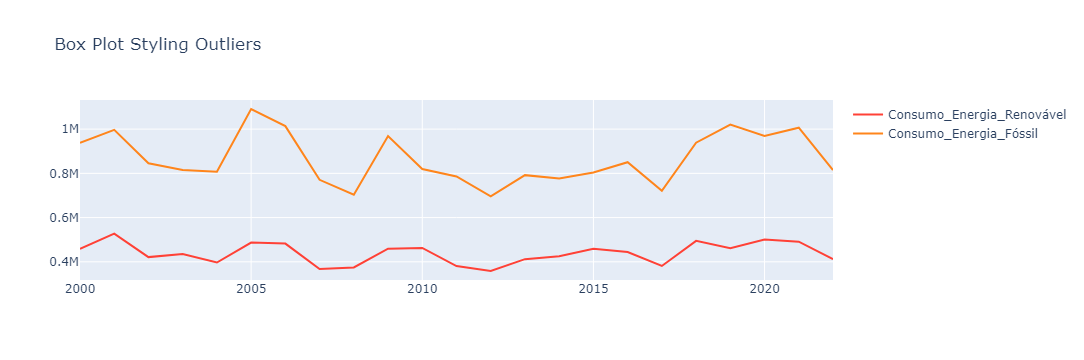

In [62]:
fig = go.Figure()

df_co2_group_ano = df_co2.drop(columns=["Continente","País"]).groupby("Ano").sum()

fig.add_trace(go.Scatter(
    y=df_co2_group_ano["Consumo_Energia_Renovável (MWh)"],
    x=df_co2_group_ano.index,
    name="Consumo_Energia_Renovável",
    marker_color='#FF4136'
))

fig.add_trace(go.Scatter(
    y=df_co2_group_ano["Consumo_Energia_Fóssil (MWh)"],
    x=df_co2_group_ano.index,
    name="Consumo_Energia_Fóssil",
     marker_color='#FF851B'
))

fig.update_layout(title_text="Box Plot Styling Outliers", boxmode="group")
fig.show()

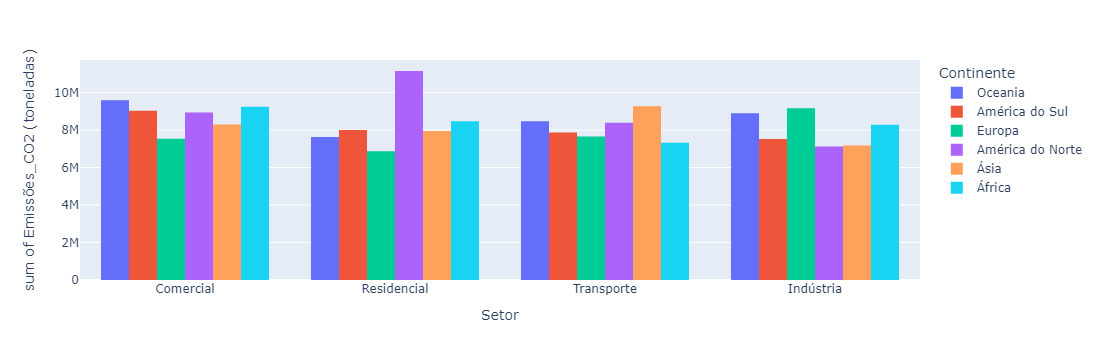

In [63]:
px.histogram(df_co2, x='Setor', y='Emissões_CO2 (toneladas)', color="Continente", barmode="group", histfunc='sum')

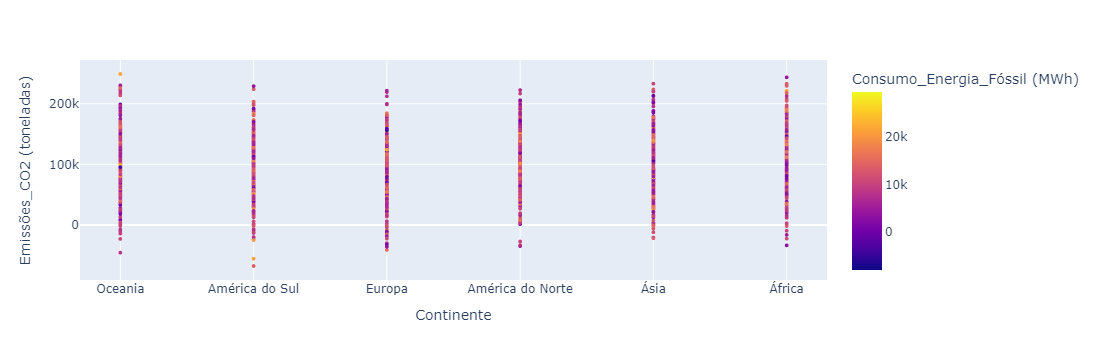

In [64]:
fig = px.scatter(
    df_co2, 
    x="Continente",
    y="Emissões_CO2 (toneladas)",
    color="Consumo_Energia_Fóssil (MWh)"
)

fig.update_traces(marker_size=4)
fig.update_layout(scattermode="group", scattergap=0.90)
fig.show()

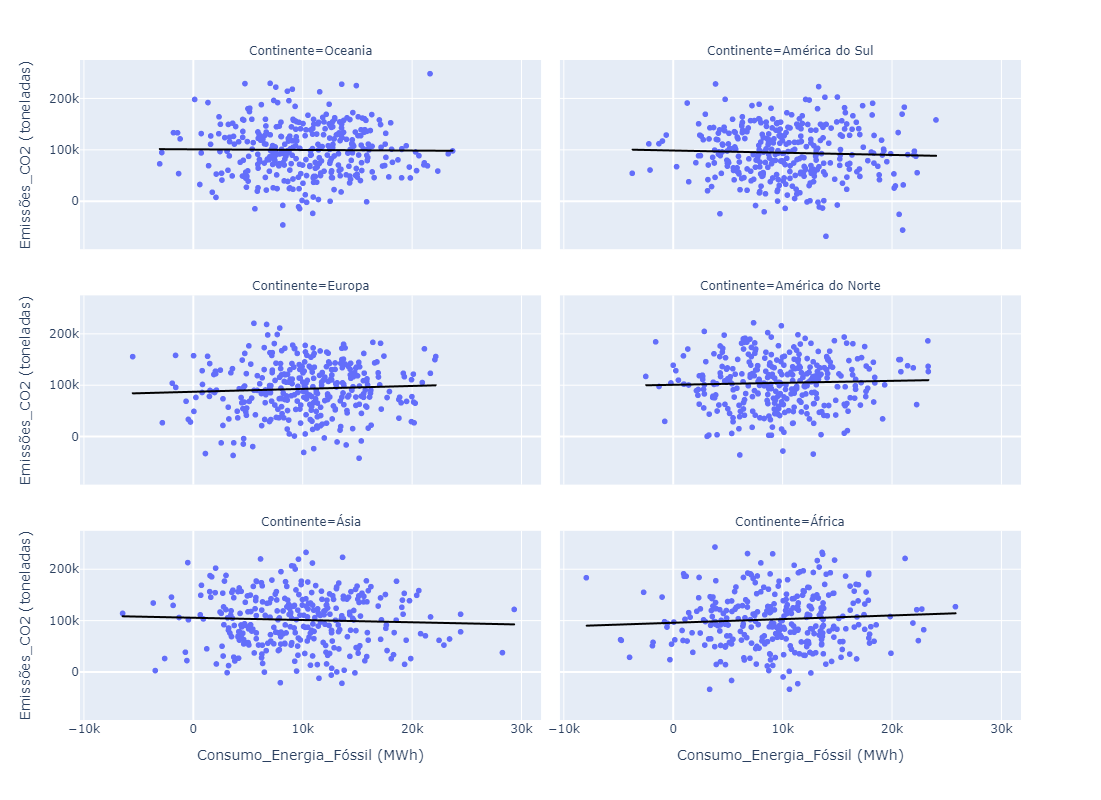

In [65]:
fig = px.scatter(
    df_co2,
    x='Consumo_Energia_Fóssil (MWh)',
    y='Emissões_CO2 (toneladas)',
    facet_col='Continente',
    facet_col_wrap=2,
    trendline="ols",
    trendline_color_override="black",
    height=800
)

fig.show()

In [66]:
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
import pandas as pd

# Supondo que df_co2 já esteja definido e carregado
app = Dash(__name__)

app.layout = html.Div([
    html.H1('Análise de Emissões de CO₂ e Consumo de Energia Renovável e Fóssil'),
    
    dcc.RadioItems(
        id='continente-radio',
        options=[{'label': c, 'value': c} for c in df_co2['Continente'].unique()],
        value='Oceania',  # valor padrão
        labelStyle={'display': 'block'}, 
    ),
    
    dcc.Dropdown(
        id='setor-dropdown',
        options=[],  # Inicialmente vazio, será preenchido na callback
        value=None,  # Valor padrão
        multi=False,
        placeholder="Selecione um setor",
    ),

    dcc.RadioItems(
        id='tipo-consumo-radio',
        options=[
            {'label': 'Consumo de Energia Renovável (MWh)', 'value': 'Consumo_Energia_Renovável (MWh)'},
            {'label': 'Consumo de Energia Fóssil (MWh)', 'value': 'Consumo_Energia_Fóssil (MWh)'}
        ],
        value='Consumo_Energia_Renovável (MWh)',  # valor padrão
        labelStyle={'display': 'block'},
    ),

    dcc.Graph(id='graph'),
])

@app.callback(
    Output('setor-dropdown', 'options'),
    Output('setor-dropdown', 'value'),
    Input('continente-radio', 'value')
)
def update_setor_options(selected_continent):
    # Filtrando os dados com base no continente selecionado
    filtered_df = df_co2[df_co2['Continente'] == selected_continent]
    
    # Obtendo os setores únicos do dataframe filtrado
    setores = filtered_df['Setor'].unique()
    
    return [{'label': s, 'value': s} for s in setores], None  # Retorna opções e valor inicial None

@app.callback(
    Output('graph', 'figure'),
    Input('continente-radio', 'value'),
    Input('setor-dropdown', 'value'),
    Input('tipo-consumo-radio', 'value')
)
def update_graph(selected_continent, selected_setor, selected_consumo):
    # Filtrando os dados com base no continente e setor selecionados
    filtered_df = df_co2[df_co2['Continente'] == selected_continent]
    
    if selected_setor:  # Verifica se um setor foi selecionado
        filtered_df = filtered_df[filtered_df['Setor'] == selected_setor]
    
    # Agrupando os dados
    df_grouped = filtered_df.groupby('Ano', as_index=False).agg({
        'Consumo_Energia_Renovável (MWh)': 'sum',
        'Consumo_Energia_Fóssil (MWh)': 'sum',
        'Emissões_CO2 (toneladas)': 'sum'
    })

    # Ajustando as emissões de CO₂ com base no tipo de consumo selecionado
    if selected_consumo == 'Consumo_Energia_Renovável (MWh)':
        emissions = df_grouped['Emissões_CO2 (toneladas)'] * (df_grouped['Consumo_Energia_Renovável (MWh)'] / df_grouped['Consumo_Energia_Renovável (MWh)'].sum())
    else:
        emissions = df_grouped['Emissões_CO2 (toneladas)'] * (df_grouped['Consumo_Energia_Fóssil (MWh)'] / df_grouped['Consumo_Energia_Fóssil (MWh)'].sum())

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=df_grouped['Ano'],
        y=emissions,
        name='Emissões de CO₂ (toneladas)',
        marker_color='lightblue'
    ))

    fig.add_trace(go.Scatter(
        x=df_grouped['Ano'],
        y=df_grouped[selected_consumo],  # Usando a opção selecionada
        mode='lines+markers',
        name=selected_consumo,
        line=dict(color='orange'),
        yaxis='y2'  # Usando um eixo Y secundário
    ))

    fig.update_layout(
        title=f'Emissões de CO₂ e {selected_consumo} para {selected_continent}' + (f" - Setor: {selected_setor}" if selected_setor else ""),
        xaxis_title='Ano',
        yaxis_title='Emissões de CO₂ (toneladas)',
        yaxis=dict(title='Emissões de CO₂ (toneladas)', side='left'),
        yaxis2=dict(title=selected_consumo, overlaying='y', side='right', showgrid=False),
        legend=dict(x=0, y=1.1, orientation='h')
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


### Análise 
#### Como o consumo de energia está relacionada a emissões de co2? destaque diferenças regionais e setorias

O consumo de energia e as emissões de CO₂ estão totalmente ligados. O impacto das emissões de CO₂ é particularmente pronunciado nas regiões mais industrializadas e urbanizadas, onde a demanda por energia é elevada. A América do Norte, é a maior emissora de CO₂, devido ao seu alto consumo de energia proveniente de fontes fósseis. 

Esse padrão é impulsionado por uma combinação de atividades industriais intensivas em energia, transporte e um estilo de vida que prioriza o consumo. Em contraste, a Europa e a África apresentam níveis de emissão significativamente mais baixos. A Europa, com políticas ambientais mais rigorosas e um aumento na utilização de energias renováveis, enquanto a África, com sua infraestrutura em desenvolvimento e menor consumo de energia per capita, resulta em menores níveis de emissões.

As diferenças setoriais também são fundamentais para entender essa dinâmica. Na Oceania, por exemplo, o setor comercial é o maior consumidor de energia. Esse consumo elevado pode impactar as emissões de CO₂, principalmente se a energia utilizada for derivada de fontes fósseis. Na América do Sul, a indústria é o principal setor responsável pelo consumo de energia, o que leva a um aumento nas emissões de CO₂, especialmente em países que ainda dependem significativamente de combustíveis fósseis. A Europa, por sua vez, apresenta um panorama diversificado, onde o setor residencial e o industrial contribuem consideravelmente para o consumo de energia e, consequentemente, para as emissões de CO₂.

OBS: Mas mesmo que outros setores usem mais energia em outras regiões, podemos ver que o da industria é sempre o mais poluente. Porém na Europa, o Residencial consegue bater de frente nesse cenário. E o da Oceania o Comericial é o mais consumido, mas com o industrailização depois de 2015, o gráfico subiu MUITO para fontes fósseis e consequentemente mais emissões de CO₂.

Além disso, ao analisarmos as emissões de CO₂, podemos observar que na Europa, as emissões estão mais associadas aos setores residencial e industrial, enquanto na América do Sul e América do Norte, a indústria desempenha um papel central nas emissões. Isso indica que a maneira como a energia é consumida e gerenciada varia amplamente entre regiões e setores, moldando não apenas as emissões de CO₂, mas também as estratégias necessárias para mitigar os impactos das mudanças climáticas.

Diante disso, é crucial que as políticas energéticas e ambientais sejam adaptadas às realidades regionais e setoriais. Uma compreensão mais profunda das interações entre consumo de energia e emissões de CO₂ com o setor destaque pode ajudar a identificar oportunidades para promover a eficiência energética para o mundo.